# Практическая работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0304 Голиков Анатолий, Решоткин Артём и Крицын Данила. Вариант №5.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Среднее значение дискретного сигнала: $M = \frac{\sum_{k=0}^{N}x(k)}{N}$.

Энергия дискретного сигнала: $E = \sum_{k=0}^{N}|x(k)|^2$.

Средняя мощность дискретного сигнала: $P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$.

Огибающая сигнала — это функция, описывающая изменения амплитуды сигнала во времени.

#### Виды дискретных гармонических сигналов:

Дискретный прямоугольный импульс:

$$ s_1(k) = \begin{cases} U, \quad n_0 \le k \le n_0 + n_{imp} - 1 \\ 0, \quadиначе \end{cases} $$

Гармонический сигнал:

$$ s(k) = C cos(\widehat{\omega_0} k) $$

## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

Nb = 5
N = 30 + Nb % 5
a = ((-1) ** Nb) * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
omega0 = math.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
omega1 = math.pi / (4 + Nb % 5)
omega2 = math.pi / (8 + Nb % 5)
omega3 = math.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

#### 1. Смоделировать прямоугольный дискретный импульс

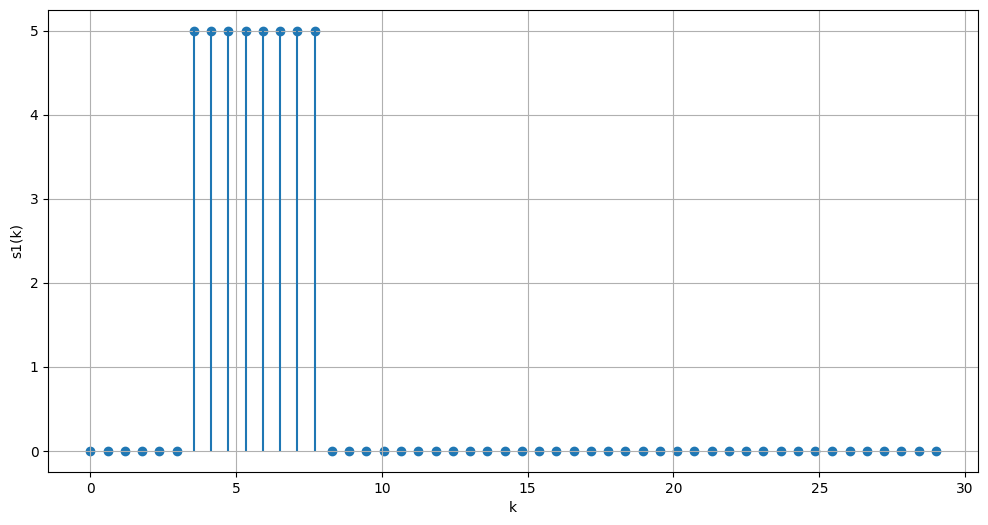

In [2]:
def sigma_d(k): # дискретный единичный скачок из пр.раб. 1
    return 1 if k >= 0 else 0

def s1(k): # дискретный прямоугольный импульс
    return U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp)))

sp = np.linspace(0, N - 1)

plt.figure(figsize=(12, 6))
plt.scatter(sp, [s1(k) for k in sp])
plt.vlines(sp, 0, [s1(k) for k in sp])
plt.ylabel("s1(k)")
plt.xlabel("k")
plt.grid()
plt.show()

Прямоугольный импульс был представлен как линейная комбинация двух дискретных единичных скачков с задержкой:
$$s_1(k)= U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$
Так как скачки имеют противоположные знаки в линейной комбинации (но одинаковые амплитуды), то они не гасят друг друга на отрезке $[n_0; n_0 + n_{imp})$.

#### 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$
где
$$x_i(k) = B_isin(\widehat{\omega}_i k), \quad i = 1,2,3$$

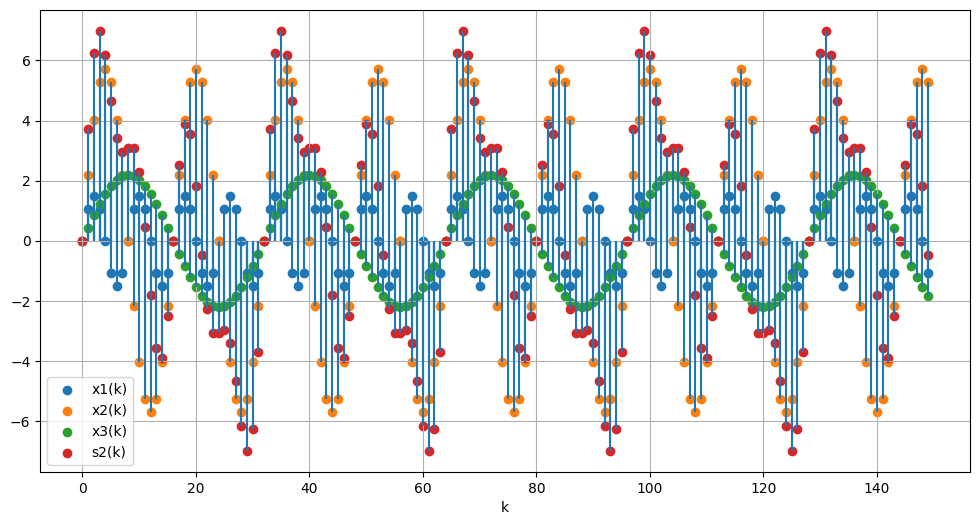

In [3]:
def plot_harmonic(sp, func, lab):
    plt.scatter(sp, [func(k) for k in sp], label=lab)
    plt.vlines(sp, 0, [func(k) for k in sp])

# Гармонические сигналы
def x1(k):
    return B1*math.sin(omega1 * k)

def x2(k):
    return B2*math.sin(omega2 * k)

def x3(k):
    return B3*math.sin(omega3 * k)

# Линейная комбинация
def s2(k):
    return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

sp = np.linspace(0, 5*N - 1, 5*N)

plt.figure(figsize=(12, 6))
plot_harmonic(sp, x1, "x1(k)")
plot_harmonic(sp, x2, "x2(k)")
plot_harmonic(sp, x3, "x3(k)")
plot_harmonic(sp, s2, "s2(k)")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.show()

In [4]:
sp = np.linspace(0, 5*N - 1, 5*N)
mean_s2 = np.mean(list(map(s2, sp)))
print("mean_s2: ", mean_s2)

E = np.sum(list(map(lambda s: s2(s)**2, sp)))
print("E: ", E)
P = E / (5*N)
print("P: ", P)

mean_s2:  0.28396041266583466
E:  2231.4741570344095
P:  14.876494380229396


Для получения амплитуды комбинации сигналов в каждом отсчёте суммировались амплитуды всех трёх гармонических функций $x_1(k), x_2(k), x_3(k)$, умноженные на соответствующие коэффициенты $a_1, a_2, a_3$.

Для полученного сигнала можно определить следующие характеристики:
* Среднее значение дискретного сигнала: $$ M_o = \frac{\sum_{k=0}^{5N-1}{s_2(k)}}{5N} $$
* Энергия: $$ E = \sum_{k=0}^{5N-1}{s_2^2(k)} $$
* Средняя мощность: $$ P = \frac{E}{5N} $$

#### 3. Смоделировать дискретный гармонический сигнал $s_3(k)$ и отобразить его огибающую $|a|^k$
Для того, чтобы сигнал $s_3(k)$ имел данную огибающую, он был выведен путём умножения дискретного гармонического сигнала $s(k) =  C cos(\widehat{\omega}_0 k)$ на эскпоненциальную огибающую $|a|^k$:
$$s_3(k) = C cos(\widehat{\omega}_0 k) |a|^k$$

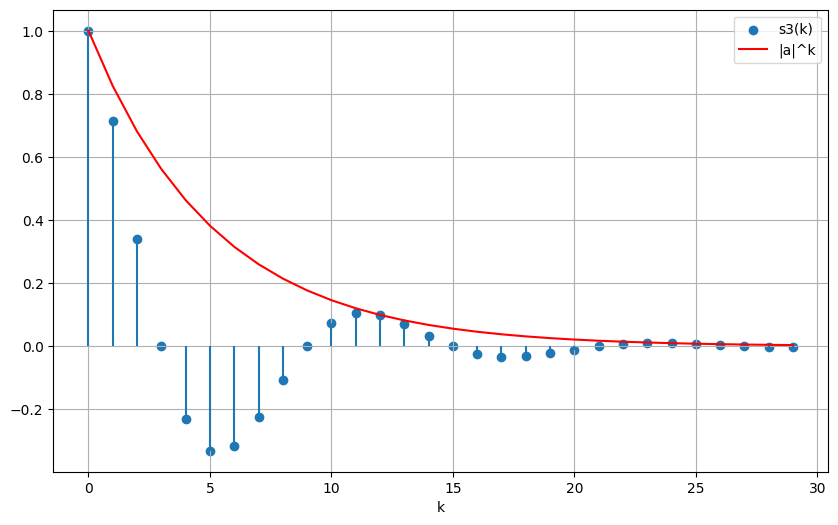

In [13]:
sp = np.linspace(0, N - 1, N)
def s3(k):
    return abs(a)**k * C * math.cos(omega0 * k)

plt.figure(figsize=(10, 6))
plt.scatter(sp, [s3(n) for n in sp], label="s3(k)")
plt.xlabel("k")
plt.vlines(sp, 0, [s3(n) for n in sp])
plt.plot(abs(a)**sp, color="red", label="|a|^k")
plt.grid()
plt.legend()
plt.show()

#### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$
Для получения $s_4(k)$ были суммированы прямоугольные импульсы $s_1(k)$ (которые уже имеют длительность $n_{imp}$) с задержкой в $ip$, где $i$ - индекс импулься (0, 1, 2...), а $p = 2n_{imp}$ - период.
Итого получаем
$$s_4(k) = \sum_{i = 0}^N{s_1(k - i \cdot 2n_{imp})} $$

[0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0]


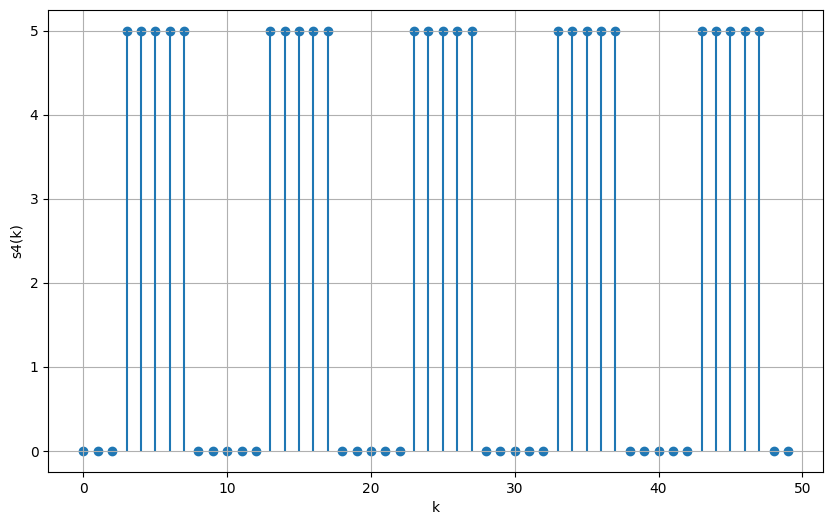

In [22]:
p = 2*n_imp

def s4(k, i):
    return s1(k - (i * p))

sp = np.linspace(0, 5*p - 1, 5*p)
def s4_values(k):
    return np.sum([ s4(k, i) for i in range(0, 5) ])

print([s4_values(k) for k in sp])

plt.figure(figsize=(10, 6))
plt.scatter(sp, [s4_values(k) for k in sp])
plt.ylabel("s4(k)")
plt.xlabel("k")
plt.vlines(sp, 0, [s4_values(k) for k in sp])
plt.grid()
plt.show()

## Выводы
В ходе выполнения практической работы было рассмотрено математическое описание линейных комбинаций дискретных гармонических сигналов и выполнено моделирование данных сигналов при помощи языка Python. 
Были смоделированы виды дискретных сигналов: дискретный прямоугольный импульс, дискретные гармонические сигналы и их линейные комбинации. Были построены графики соответствующих сигналов на интервалах дискретного времени, а также вычислены среднее значение, энергия и средняя мощность сигналов.
Было получено, что сигналы, из которых строится линейная комбинация, влияют на форму результирующего сигнала, а линейные коэффициенты определяют изменение амплитуд этих сигналов. Кроме того, в качестве коэффициентов можно использовать другие сигналы, например определя тем самым огибающие.